In [143]:
import pandas as pd
import numpy as np

In [144]:
treino = pd.read_csv('dados/train.csv')
teste = pd.read_csv('dados/test.csv')

In [145]:
#SibSp - indicador se o passageiro está com irmão/esposo
#Parch - indicador se o passageoro está com pais/filhos
#Fare - Quanto a pessoa pagou pela passagem 
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
#n_estimators quanto maior o valor, maior a estabilidade que podemos encontrar
modelo1 = RandomForestClassifier(n_estimators = 100, n_jobs = -1,random_state = 0)

In [148]:
treino['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [149]:
treino['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [166]:
#Codificar o sexo - mulher = 1, homem = 0
dados = ['Sex_binario','Age','Fare']

In [167]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0
    
treino['Sex_binario'] = treino['Sex'].map(transformar_sexo)

In [168]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [183]:
x_treino = treino[dados]
y_treino = treino['Survived']

In [184]:
x_treino

,Sex_binario,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,1,NaN,23.4500
889,0,26.0,30.0000


In [185]:
y_treino

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [186]:
#Substituindo os valores com -1
#Usar um número que não seja utilizado
x_treino = x_treino.fillna(-1)

In [187]:
modelo1.fit(x_treino,y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Iniciando o Teste 

In [189]:
x_teste = teste[dados]

In [190]:
dados = ['Sex_binario','Age','Fare']

In [191]:
x_teste

,Sex_binario,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [192]:
teste['Sex_binario'] = teste['Sex'].map(transformar_sexo)

In [193]:
y_pred = x_teste[dados]
y_pred = x_teste.fillna(-1)
y_pred.head()

,Sex_binario,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [194]:
#Quais passageiros sobreviveram ou não
sobreviventes = modelo1.predict(y_pred)
sobreviventes

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [195]:
#Convertendo em 0 e 1
sub = pd.Series(sobreviventes, index = teste['PassengerId'], name = 'Survived')
#418 previsões como resultado
sub

PassengerId
892     0
893     0
894     0
895     1
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [196]:
#Passando para csv
sub.to_csv("primeiro_modelo.csv", header = True)


In [197]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [201]:
rf = RandomForestClassifier(n_estimators=100,max_depth=5)
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [203]:
from sklearn.metrics import plot_confusion_matrix, classification_report

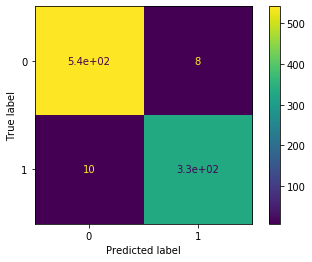

In [204]:
plot_confusion_matrix(modelo1,x,y)

In [208]:
x_teste= x_teste.fillna(-1)

In [211]:
y_pred = rf.predict(x_teste)
print(classification_report(x,y))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets